In [67]:
import easygui
import pandas as pd
import os
from moviepy import editor

FPS = 30
INPUT_AUDIO_FOLDER = "../INPUT_AUDIO/"
INPUT_IMAGE_FOLDER = "../INPUT_IMAGE/"

In [68]:
input_images_folder = easygui.diropenbox(default=INPUT_IMAGE_FOLDER)
image_list = os.listdir(input_images_folder)
image_list.sort()
image_list

['P1370745.JPG',
 'P1370746.JPG',
 'P1370747.JPG',
 'P1370748.JPG',
 'P1370749.JPG',
 'P1370750.JPG',
 'P1370751.JPG',
 'P1370752.JPG',
 'P1370753.JPG',
 'P1370754.JPG',
 'P1370755.JPG',
 'P1370756.JPG',
 'P1370757.JPG',
 'P1370758.JPG',
 'P1370759.JPG',
 'P1370760.JPG',
 'P1370761.JPG',
 'P1370762.JPG',
 'P1370763.JPG',
 'P1370764.JPG',
 'P1370765.JPG',
 'P1370766.JPG',
 'P1370767.JPG',
 'P1370768.JPG',
 'P1370769.JPG',
 'P1370770.JPG',
 'P1370771.JPG',
 'P1370772.JPG',
 'P1370773.JPG',
 'P1370774.JPG',
 'P1370775.JPG',
 'P1370776.JPG',
 'P1370777.JPG',
 'P1370778.JPG',
 'P1370779.JPG',
 'P1370780.JPG',
 'P1370781.JPG',
 'P1370782.JPG',
 'P1370783.JPG',
 'P1370784.JPG',
 'P1370785.JPG',
 'P1370786.JPG',
 'P1370787.JPG',
 'P1370788.JPG',
 'P1370789.JPG',
 'P1370790.JPG',
 'P1370791.JPG',
 'P1370792.JPG',
 'P1370793.JPG',
 'P1370794.JPG',
 'P1370795.JPG',
 'P1370796.JPG',
 'P1370797.JPG',
 'P1370798.JPG',
 'P1370799.JPG',
 'P1370800.JPG',
 'P1370801.JPG',
 'P1370802.JPG',
 'P1370803.JPG

In [70]:
input_audio_filepath = easygui.fileopenbox(default=INPUT_AUDIO_FOLDER)
print(input_audio_filepath)

audio_array = editor.AudioFileClip(input_audio_filepath, fps=FPS).to_soundarray()
audio_array = [ abs(amp) for amp in audio_array ] # get abs of amplitude
df_audio = pd.DataFrame(audio_array)
df_audio_ORIGINAL = df_audio.copy()

/media/user7/Double_Dragon/Videography/My_Python_Video_Projects/RGB/INPUT_AUDIO/Wizzy_Filtered_Drone_001_20240604_2228.mp3


df_audio.nunique() = amp               232
normalized_amp    232
dtype: int64
232


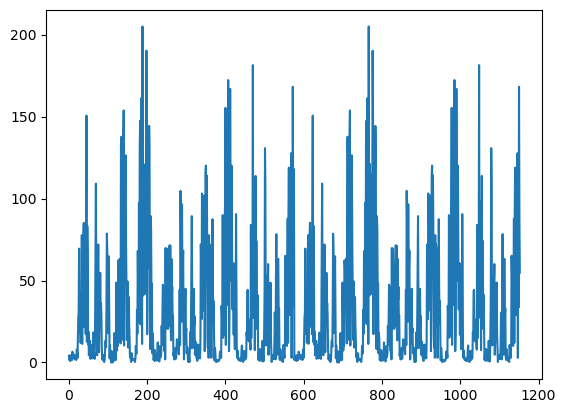

In [71]:
df_audio = df_audio_ORIGINAL.copy()

if df_audio.shape[1] == 2:
    df_audio = df_audio.mean(axis=1)
    df_audio = df_audio.to_frame()

df_audio.columns = ['amp']
df_audio['normalized_amp'] = abs(df_audio['amp'] - df_audio['amp'].min()) / (df_audio['amp'].max() - df_audio['amp'].min())
# df_audio['frame'] = df_audio['normalized_amp'] * image_list.__len__()
print(f"{df_audio.nunique() = }")
df_frames = df_audio.copy()
df_frames['normalized_amp'] = df_frames['normalized_amp'] * image_list.__len__()

df_frames['normalized_amp'].plot()
print(df_frames['normalized_amp'].nunique())
# df_frames = pd.DataFrame(df_audio)
# df_frames = df_frames.rolling(window=FPS).mean()
# df_frames.fillna(0, inplace=True)
# df_frames.nunique()
# df_frames
# df_['normalized_amp'] = (df_ - df_.min()) / (df_.max() - df_.min())
# df_['normalized_amp'] = df_['normalized_amp'] * image_list.__len__()
# df_['normalized_amp'].plot()

<Axes: >

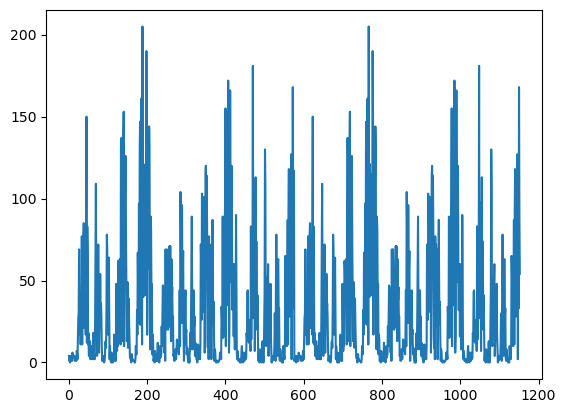

In [72]:
df_frames['imagelist_index'] = df_frames['normalized_amp'].astype(int)
df_frames.imagelist_index.plot()

In [73]:
df_audio, df_audio_ORIGINAL = None, None

In [74]:
df_frames.head(20)
len(image_list)

205

In [75]:
df_frames["image"] = [ image_list[int(i-1)] for i in df_frames['imagelist_index'].to_list()]
df_frames["image_path"] = df_frames["image"].apply(lambda x: os.path.join(input_images_folder, x))
df_frames.image_path.nunique()

121

In [76]:
df_frames.reset_index(inplace=True)
df_frames_FPS = df_frames.copy().reset_index(drop=True)
df_frames_FPS

,index,amp,normalized_amp,imagelist_index,image,image_path
0,0,0.000214,4.087423,4,P1370748.JPG,/media/user7/Double_Dragon/Videography/My_Pyth...
1,1,0.000092,1.572086,1,P1370745.JPG,/media/user7/Double_Dragon/Videography/My_Pyth...
2,2,0.000137,2.515337,2,P1370746.JPG,/media/user7/Double_Dragon/Videography/My_Pyth...
3,3,0.000061,0.943252,0,P1370949.JPG,/media/user7/Double_Dragon/Videography/My_Pyth...
4,4,0.000229,4.401840,4,P1370748.JPG,/media/user7/Double_Dragon/Videography/My_Pyth...
...,...,...,...,...,...,...
1148,1148,0.003159,64.769939,64,P1370808.JPG,/media/user7/Double_Dragon/Videography/My_Pyth...
1149,1149,0.001648,33.642638,33,P1370777.JPG,/media/user7/Double_Dragon/Videography/My_Pyth...
1150,1150,0.008179,168.213190,168,P1370912.JPG,/media/user7/Double_Dragon/Videography/My_Pyth...
1151,1151,0.004349,89.294479,89,P1370833.JPG,/media/user7/Double_Dragon/Videography/My_Pyth...


In [77]:
# create video from image list
frames_list = df_frames_FPS["image_path"].sort_index().tolist()
print(f"{frames_list = }")

clip = editor.ImageSequenceClip(frames_list, fps=FPS)

frames_list = ['/media/user7/Double_Dragon/Videography/My_Python_Video_Projects/RGB/INPUT_IMAGE/P1370748.JPG', '/media/user7/Double_Dragon/Videography/My_Python_Video_Projects/RGB/INPUT_IMAGE/P1370745.JPG', '/media/user7/Double_Dragon/Videography/My_Python_Video_Projects/RGB/INPUT_IMAGE/P1370746.JPG', '/media/user7/Double_Dragon/Videography/My_Python_Video_Projects/RGB/INPUT_IMAGE/P1370949.JPG', '/media/user7/Double_Dragon/Videography/My_Python_Video_Projects/RGB/INPUT_IMAGE/P1370748.JPG', '/media/user7/Double_Dragon/Videography/My_Python_Video_Projects/RGB/INPUT_IMAGE/P1370745.JPG', '/media/user7/Double_Dragon/Videography/My_Python_Video_Projects/RGB/INPUT_IMAGE/P1370745.JPG', '/media/user7/Double_Dragon/Videography/My_Python_Video_Projects/RGB/INPUT_IMAGE/P1370747.JPG', '/media/user7/Double_Dragon/Videography/My_Python_Video_Projects/RGB/INPUT_IMAGE/P1370745.JPG', '/media/user7/Double_Dragon/Videography/My_Python_Video_Projects/RGB/INPUT_IMAGE/P1370750.JPG', '/media/user7/Double_Drag

In [78]:
# Choose audio for output video
main_audiofile = easygui.fileopenbox(default=INPUT_AUDIO_FOLDER)
main_audio = editor.AudioFileClip(main_audiofile)

In [79]:
# clip.write_videofile("output_video.mp4", fps=FPS, codec="libx264", audio=main_audio, audio_fps=44100, preset="slow", ffmpeg_params=["-b:v", "1000k"])
clip.write_videofile("output_video_2.mp4", fps=FPS, codec="libx264", audio=main_audio, ffmpeg_params=["-b:v", "1000k"])


t:  16%|█▌        | 187/1154 [1:03:08<01:16, 12.64it/s, now=None]

Moviepy - Building video output_video_2.mp4.
Moviepy - Writing video output_video_2.mp4



t:  16%|█▌        | 187/1154 [1:04:48<01:16, 12.64it/s, now=None]

Moviepy - Done !
Moviepy - video ready output_video_2.mp4
